# Proyecto 3

 [Presentación](https://acortar.link/Nro7os)

 Obtener un dataset con las valoraciones de Bitcoin de los últimos 365 días.

Con lo que vimos ayer en la clase de API, intenta conseguir ese dataset.  

Graficar.

1) Importación de librerías necesarias:

In [2]:

import pandas as pd
import csv
import requests
import ast
import matplotlib
import matplotlib.pyplot as plt
import datetime
import numpy as np

2) Consumir la API Binance:

In [3]:
ct = str(int(datetime.datetime.now().timestamp()))
c2 = datetime.datetime.now() - datetime.timedelta(days=365*10)
ct2 = str(int(c2.timestamp()))

APIurl = "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=3d&limit=1000&startTime="+ct2+"000&endTime="+ct+"000"
APIresp = requests.get(APIurl)
print(APIresp.ok)
print(APIresp.status_code)
print(APIresp.elapsed)
x = ast.literal_eval(APIresp.text)
df = pd.DataFrame(x)

True
200
0:00:00.507236


In [4]:
# Grabamos el resultado como CSV separado por comas
CSVfilename = "binance.csv"
df.to_csv(CSVfilename, index=False)

# Empezar desde aquí

In [12]:
df = pd.read_csv('binance.csv')
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1502928000000,4261.48,4485.39,3850.00,4139.98,2376.348404,1503187199999,1.009121e+07,10813,1863.453293,7.925342e+06,0
1,1503187200000,4120.98,4211.08,3400.00,4040.00,2125.510940,1503446399999,8.480102e+06,12787,1358.147235,5.450252e+06,0
2,1503446400000,4040.00,4453.91,4013.89,4280.68,2362.168058,1503705599999,9.929800e+06,21430,616.337478,2.596523e+06,0
3,1503705600000,4280.71,4400.00,4124.54,4386.69,1182.642269,1503964799999,5.091106e+06,10279,300.629281,1.296170e+06,0
4,1503964800000,4353.65,4745.42,4313.55,4724.89,1968.970601,1504223999999,8.946077e+06,13871,471.452144,2.150945e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
661,1674259200000,22666.00,23371.80,22292.37,22916.45,893611.616560,1674518399999,2.041868e+10,21659002,444360.797300,1.015425e+10,0
662,1674518400000,22917.81,23816.73,22300.00,23009.65,928126.050580,1674777599999,2.126162e+10,22637116,460072.828120,1.054029e+10,0
663,1674777600000,23009.65,23960.54,22534.88,23742.30,724638.366040,1675036799999,1.681262e+10,18291749,363068.618140,8.424708e+09,0
664,1675036800000,23743.37,23812.66,22500.00,23732.66,877845.673010,1675295999999,2.031713e+10,22451848,438232.242610,1.014359e+10,0


In [13]:
df = df.drop(df.columns[[0,1,2,3,5,7,8,9,10,11]], axis='columns')
df = df.rename(columns={'4':'price', '6':'date'})
#df.dtypes
df.columns


Index(['price', 'date'], dtype='object')

3) Convetir fecha

In [15]:
from datetime import datetime
listaDate = []
for date in df['date']:
    listaDate.append(datetime.fromtimestamp(date//1000))
df.index = listaDate

4) convertir antes al formato datetime para que lo reconozca como índice timestamp

<function matplotlib.pyplot.show(close=None, block=None)>

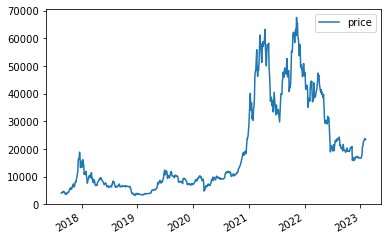

In [16]:
df.plot(kind='line', y='price')
plt.show

In [8]:
semestral = df.groupby(np.arange(len(df))//6).mean()

In [ ]:
semestral["dif"] = semestral.cambio.dif()

semestral["variacion"] = semestral.dif/semestral.cambio.shift(1)*100

### Modelos ARIMA

In [17]:
from statsmodels.tsa.arima_model import ARIMA

# Crear el modelo ARIMA
model = ARIMA(df['price'], order=(2, 1, 2))
model_fit = model.fit()

# Realizar la predicción
predictions = model_fit.forecast(steps=30)[0]

# Imprimir las predicciones
print(predictions)

c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

[23449.47550067 23559.32569924 23583.05264057 23681.14684201
 23703.81418165 23791.91026551 23813.93949413 23893.52549596
 23915.23656027 23987.57307283 24009.20535807 24075.36113636
 24097.09041565 24157.97229296 24179.92438818 24236.30242754
 24258.56419206 24311.0928452  24333.72096859 24382.95688783
 24405.98493194 24452.40197437 24475.84597558 24519.84785077
 24543.71076201 24585.64170079 24609.91689652 24650.07065691
 24674.74468322 24713.37215817]


c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


### Calcular el Moving Average con una ventana de 3

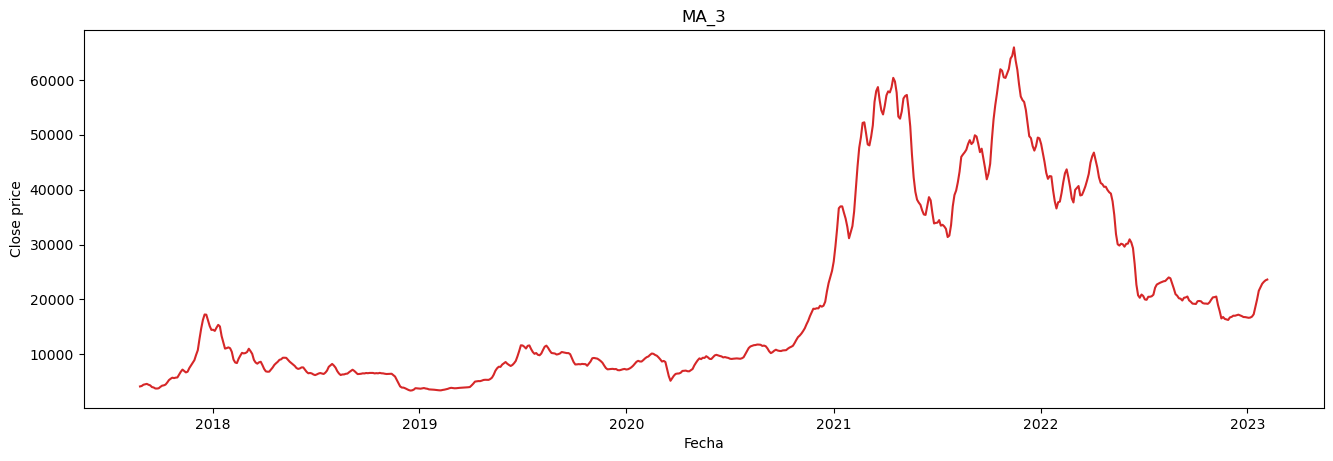

In [19]:
# Calcular el Moving Average con una ventana de 3
df['MA_3'] = df['price'].rolling(window=3).mean()

# Imprimir el DataFrame para verificar los cambios
plot_df(df, x=df.index, y=df['MA_3'], title='MA_3')

#df.head()
#print(df)

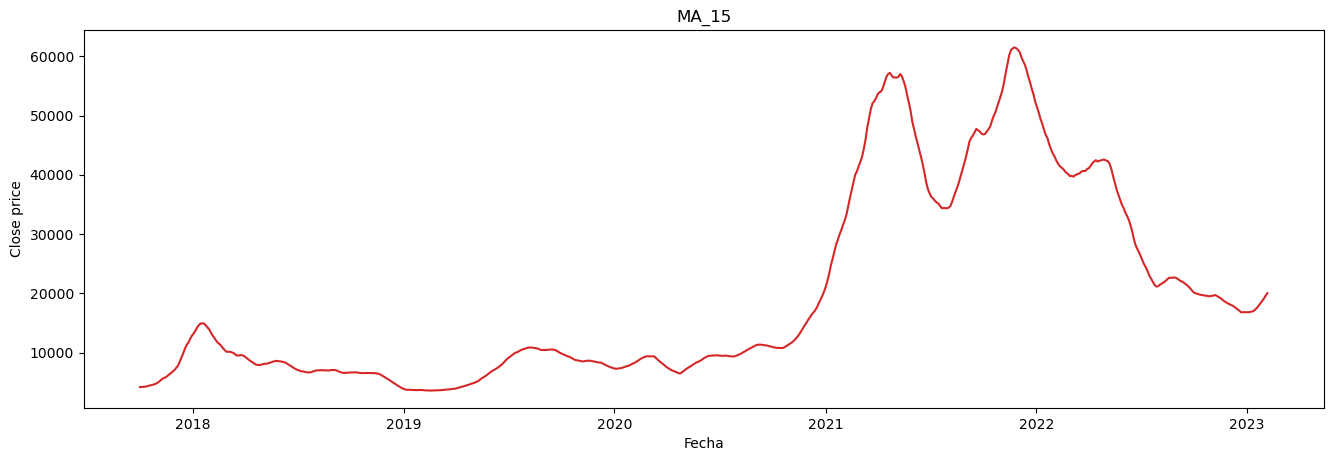

In [20]:
# Calcular el Moving Average con una ventana de 15
df['MA_15'] = df['price'].rolling(window=15).mean()

# Imprimir el DataFrame para verificar los cambios
plot_df(df, x=df.index, y=df['MA_15'], title='MA_15')

In [21]:
df.head()

,price,date,MA_3,MA_15
2017-08-20 01:59:59,4139.98,1503187199999,NaN,NaN
2017-08-23 01:59:59,4040.00,1503446399999,NaN,NaN
2017-08-26 01:59:59,4280.68,1503705599999,4153.553333,NaN
2017-08-29 01:59:59,4386.69,1503964799999,4235.790000,NaN
2017-09-01 01:59:59,4724.89,1504223999999,4464.086667,NaN


#### Ploteamos la estacionalidad

In [22]:
# Preparamos los datos:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

In [24]:
import matplotlib as mpl
# Preparamos los colores:
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

In [25]:
# Preparamos los colores:
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

In [26]:
# Ploteamos
plt.figure(figsize=(16, 12), dpi=80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'price', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'price'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# matplotlib.pyplot.gca
# The gca() function in pyplot module of matplotlib library is used to get the current Axes instance on the current figure
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Ventas$', xlabel='$Mes$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Gráfico Estacional de ventas de medicamentos", fontsize=20)
plt.show()

ValueError: Image size of 10748x1202780 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1280x960 with 1 Axes>